<h1 align=center><font size = 5>Attractions in Ahmedabad City, Gujrat, India</font></h1>

# Table of Contents

1. <a href="#item1">Introduction</a>
2. <a href="#item2">Data Collection using Foursquare API</a>  
3. <a href="#item3">Data Cleaning</a>  
4. <a href="#item4">Methodology</a>  
5. <a href="#item5">Analysis & Result</a>  
6. <a href="#item5">Conclusion</a>  

## Introduction

Ahmedabad is the largest city and former capital of the Indian state of Gujarat. It has emerged as an important economic and industrial hub in India. It is the second-largest producer of cotton in India, and its stock exchange is the country's second oldest. Cricket is a popular sport in Ahmedabad. It is a major tourist attraction.

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.

### The aim of the project is to identify venues in Ahmedabad, India using Foursquare API. Finally, home on to areas which are most frequented by visitors and list them according to their types and what they are famous for. 



#### Description of the Problem

To start a new venture in a city, it is important to first identify the places which can draw maximum customers.
Here, we'll identify places that are frequented most by the visitors based on the information collected from Foursquare API and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

## Data Collection Using Foursquare API

Firstly we will have a look at Ahmedabad Map using the folium library.

#### Ahmedabad, India

Ahmedabad is located on the banks of the Sabarmati River, 23 km (14 mi) from the state capital Gandhinagar, which is its twin city. Ahmedabad has emerged as an important economic and industrial hub in India. Being an important historical town, it has two clear distinct segments - the old town area and the newly developed commercial centers in the east.

We can use the geopy library to extract the latitude and longitude values of Ahmedabad but it seems off and thus, we'll directly supply the values in this case.

In [1]:
AMD_LATITUDE = '23.0225'
AMD_LONGITUDE = '72.5714'
print('The geograpical coordinates of Ahmedabad are {}, {}.'.format(AMD_LATITUDE, AMD_LONGITUDE))

The geograpical coordinates of Ahmedabad are 23.0225, 72.5714.


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [3]:
ahmedabad_map = folium.Map(location = [23.0225, 72.5714], zoom_start=13)
ahmedabad_map

### Collect Data Using Foursquare API¶
We begin by fetching a total of all venues in Ahmedabad upto a range of 4 Kilometers using the Foursquare API. The Foursquare API has the explore API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

In [49]:
FOURSQUARE_CLIENT_ID = 'ZON3J3KGEICTDB0LUVQZDZYJCBNAYGQ13H3TXHLQ3QGK5OHU'
FOURSQUARE_CLIENT_SECRET = 'RU3XRV3A3WKW05NWQCU5D12HGSFXF0KZ0LX5ZMPSFTLDBTUU'
RADIUS = 4000 # 4 Km
NO_OF_VENUES = 200
VERSION = '20200527' # Current date

In [50]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        AMD_LATITUDE, 
                                                                        AMD_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 200):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))


Total 80 venues fetched within a total radius of 4.0 Km

Total 80 venues fetched


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead




## Creating the Data Frame from Data of Foursquare API


In [51]:
# assign relevant part of JSON to venues
venues = result['response']['groups'][0]['items']
   
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood
0,e-0-4bf8c05492d19521074a5a1f-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bf8c05492d19521074a5a1f,Crossword,Shree Krishna Center,Mithakhali Six Roads,23.032656,72.565404,"[{'label': 'display', 'lat': 23.03265560009132...",...,Ahmedabad,Gujarāt,India,"[Shree Krishna Center (Mithakhali Six Roads), ...","[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",0,[],NaN,NaN,NaN
1,e-0-4baa1849f964a5204d4a3ae3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4baa1849f964a5204d4a3ae3,Swati Snacks,"Nr Gandhi Baug Society, Law Garden",Panchvati Road,23.024438,72.559087,"[{'label': 'display', 'lat': 23.02443798062042...",...,Ahmedabad,Gujarāt,India,"[Nr Gandhi Baug Society, Law Garden (Panchvati...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN,NaN,NaN
2,e-0-4f2c2b84e4b0e6b070ef1352-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f2c2b84e4b0e6b070ef1352,Manek Chowk Khau Gali,Manek Chowk,Manekchowk,23.023505,72.588539,"[{'label': 'display', 'lat': 23.02350527643007...",...,Ahmedabad,Gujarāt,India,"[Manek Chowk (Manekchowk), Ahmedabad 380001, G...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],380001,NaN,NaN
3,e-0-4bc574270a30d13a40125a9c-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bc574270a30d13a40125a9c,TOMATO'S,1-3 Mardia Plaza,C G Road,23.026693,72.557488,"[{'label': 'display', 'lat': 23.02669296963554...",...,Ahmedabad,Gujarāt,India,"[1-3 Mardia Plaza (C G Road), Ahmedabad, Gujar...","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",0,[],NaN,NaN,NaN
4,e-0-4ed13a649adf254457e88251-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ed13a649adf254457e88251,Manek Chowk,Manek chowk,Mandvi's pole,23.023626,72.588553,"[{'label': 'display', 'lat': 23.02362593356704...",...,Ahmedabad,Gujarāt,India,"[Manek chowk (Mandvi's pole), Ahmedabad 380001...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],380001,NaN,NaN


In [52]:
dataframe_filtered = dataframe

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['famous'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,referralId,count,items,id,name,address,crossStreet,lat,lng,labeledLatLngs,...,state,country,formattedAddress,categories,count,groups,postalCode,id,neighborhood,famous
0,e-0-4bf8c05492d19521074a5a1f-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bf8c05492d19521074a5a1f,Crossword,Shree Krishna Center,Mithakhali Six Roads,23.032656,72.565404,"[{'label': 'display', 'lat': 23.03265560009132...",...,Gujarāt,India,"[Shree Krishna Center (Mithakhali Six Roads), ...","[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",0,[],NaN,NaN,NaN,Bookstore
1,e-0-4baa1849f964a5204d4a3ae3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4baa1849f964a5204d4a3ae3,Swati Snacks,"Nr Gandhi Baug Society, Law Garden",Panchvati Road,23.024438,72.559087,"[{'label': 'display', 'lat': 23.02443798062042...",...,Gujarāt,India,"[Nr Gandhi Baug Society, Law Garden (Panchvati...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN,NaN,NaN,Snack Place
2,e-0-4f2c2b84e4b0e6b070ef1352-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f2c2b84e4b0e6b070ef1352,Manek Chowk Khau Gali,Manek Chowk,Manekchowk,23.023505,72.588539,"[{'label': 'display', 'lat': 23.02350527643007...",...,Gujarāt,India,"[Manek Chowk (Manekchowk), Ahmedabad 380001, G...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],380001,NaN,NaN,Snack Place
3,e-0-4bc574270a30d13a40125a9c-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bc574270a30d13a40125a9c,TOMATO'S,1-3 Mardia Plaza,C G Road,23.026693,72.557488,"[{'label': 'display', 'lat': 23.02669296963554...",...,Gujarāt,India,"[1-3 Mardia Plaza (C G Road), Ahmedabad, Gujar...","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",0,[],NaN,NaN,NaN,Mexican Restaurant
4,e-0-4ed13a649adf254457e88251-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ed13a649adf254457e88251,Manek Chowk,Manek chowk,Mandvi's pole,23.023626,72.588553,"[{'label': 'display', 'lat': 23.02362593356704...",...,Gujarāt,India,"[Manek chowk (Mandvi's pole), Ahmedabad 380001...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],380001,NaN,NaN,Fast Food Restaurant


## Data Cleaning

**We don't want to use all the data in the data frame. This project aims at identifying the categories of venues in Ahmedabad & their rating. This would enable any visitor to identify the venues he/she wants to visit based on their rating.**

**Hence, we will drop certain columns which are not of our interest**

In [53]:
dataframe_filtered.dtypes

referralId           object
count                 int64
items                object
id                   object
name                 object
address              object
crossStreet          object
lat                 float64
lng                 float64
labeledLatLngs       object
distance              int64
cc                   object
city                 object
state                object
country              object
formattedAddress     object
categories           object
count                 int64
groups               object
postalCode           object
id                   object
neighborhood         object
famous               object
dtype: object

#### **There is a need to clean the data in the category and items to clearly understand the type of venue and for what it is famous for?.**

In [54]:
# function that extracts the type of the venue from items column
def get_items_type(row):
    try:
        items_list = row['categories']
    except:
        items_list = row['items']
        
    if len(items_list) == 0:
        return None
    else:
        return items_list[0]['name']

# filter the category for each row
dataframe_filtered['Type'] = dataframe_filtered.apply(get_items_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,referralId,count,items,id,name,address,crossStreet,lat,lng,labeledLatLngs,...,country,formattedAddress,categories,count,groups,postalCode,id,neighborhood,famous,Type
0,e-0-4bf8c05492d19521074a5a1f-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bf8c05492d19521074a5a1f,Crossword,Shree Krishna Center,Mithakhali Six Roads,23.032656,72.565404,"[{'label': 'display', 'lat': 23.03265560009132...",...,India,"[Shree Krishna Center (Mithakhali Six Roads), ...","[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",0,[],NaN,NaN,NaN,Bookstore,Bookstore
1,e-0-4baa1849f964a5204d4a3ae3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4baa1849f964a5204d4a3ae3,Swati Snacks,"Nr Gandhi Baug Society, Law Garden",Panchvati Road,23.024438,72.559087,"[{'label': 'display', 'lat': 23.02443798062042...",...,India,"[Nr Gandhi Baug Society, Law Garden (Panchvati...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN,NaN,NaN,Snack Place,Snack Place
2,e-0-4f2c2b84e4b0e6b070ef1352-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f2c2b84e4b0e6b070ef1352,Manek Chowk Khau Gali,Manek Chowk,Manekchowk,23.023505,72.588539,"[{'label': 'display', 'lat': 23.02350527643007...",...,India,"[Manek Chowk (Manekchowk), Ahmedabad 380001, G...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],380001,NaN,NaN,Snack Place,Snack Place
3,e-0-4bc574270a30d13a40125a9c-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bc574270a30d13a40125a9c,TOMATO'S,1-3 Mardia Plaza,C G Road,23.026693,72.557488,"[{'label': 'display', 'lat': 23.02669296963554...",...,India,"[1-3 Mardia Plaza (C G Road), Ahmedabad, Gujar...","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",0,[],NaN,NaN,NaN,Mexican Restaurant,Mexican Restaurant
4,e-0-4ed13a649adf254457e88251-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ed13a649adf254457e88251,Manek Chowk,Manek chowk,Mandvi's pole,23.023626,72.588553,"[{'label': 'display', 'lat': 23.02362593356704...",...,India,"[Manek chowk (Mandvi's pole), Ahmedabad 380001...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],380001,NaN,NaN,Fast Food Restaurant,Fast Food Restaurant


In [112]:
selected_venues = dataframe_filtered[['name', 'address','famous', 'Type', 'lat', 'lng']]
selected_venues.head()

,name,address,famous,Type,lat,lng
0,Crossword,Shree Krishna Center,Bookstore,Bookstore,23.032656,72.565404
1,Swati Snacks,"Nr Gandhi Baug Society, Law Garden",Snack Place,Snack Place,23.024438,72.559087
2,Manek Chowk Khau Gali,Manek Chowk,Snack Place,Snack Place,23.023505,72.588539
3,TOMATO'S,1-3 Mardia Plaza,Mexican Restaurant,Mexican Restaurant,23.026693,72.557488
4,Manek Chowk,Manek chowk,Fast Food Restaurant,Fast Food Restaurant,23.023626,72.588553


In [56]:
selected_venues.shape

(80, 6)

#### Finally now we have a filtered dataframe of famous venues in Ahmedabad. It displays the type of venue and what it is famous for?



## Methodology

The aim of the project is to identify venues in Ahmedabad, India using Foursquare API. Finally, home on to areas which are most frequented by visitors and list them according to their types and what they are famous for.

**Step 1** : As a first step, we retrieved the data from Foursquare APIs. We extract venue information from the center of Ahmedabad, upto a distance of 4 Km.

**Step 2** : We plotted the data on the map of Ahmedabad to understand the geographic locations and broad clustering of these venues.

**Step 3** : In the third step we generated the data frame of these venues.

**Step 4** : And finally we cleaned the data and retreived the relevant data for our analysis.


Now, we'll analyse the data that we created. We'll identify places where many venues are located so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore the categories of venues and see which are more preferred categories of venues amongst the visitors. Lastly, we'll cluster the venues based on the available information of each venue. 

Finally, we'll discuss and conclude which venues to be explored. It will also suggest should some one in future plan to establish a business venture, then which part of the city should he opt for and what types of venues will be more frequented by the visitors.



## Analysis & Results

### Preferred Locations for the Visitors

**Sabarmati River** flows through the Ahmedabad town and nearly divides it into two parts - East Ahmedabad & West Ahmedabad. It can be clearly seen that the density of venues in West Ahmedabad is more than East Ahmedabad. **Hence, visitors would prefer to go to the Western Ahmedabad on their arrival in the town.** 

In [113]:
ahmedabad_map = folium.Map(location = [23.0225, 72.5714], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(ahmedabad_map)  

ahmedabad_map



### Preferred Types of Venues

Now we will examine the data set to see which all types of venues are most frequently visited by the visitors.


In [114]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


<BarContainer object of 33 artists>

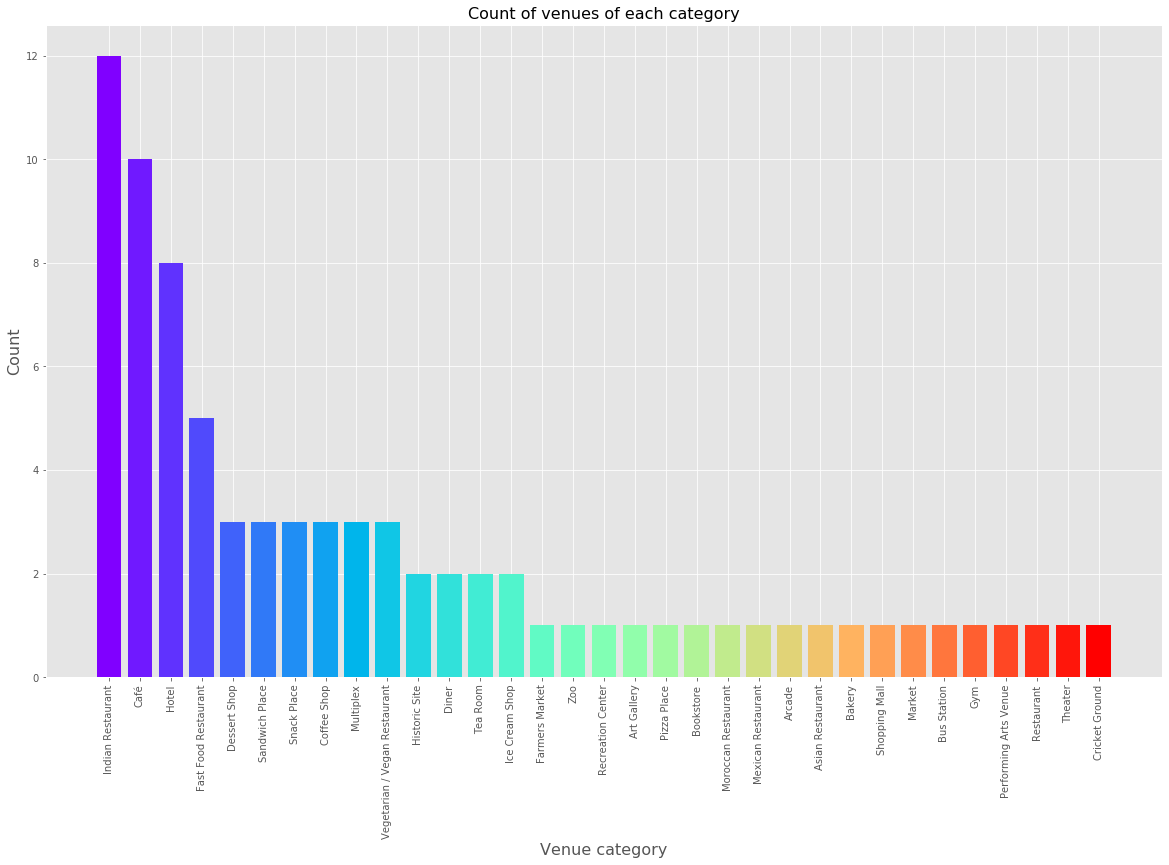

In [115]:
import numpy as np
venue_distribution = selected_venues['Type'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

In [116]:
count = selected_venues['Type'].value_counts() 
print(count)

Indian Restaurant                12
Café                             10
Hotel                             8
Fast Food Restaurant              5
Dessert Shop                      3
Sandwich Place                    3
Snack Place                       3
Coffee Shop                       3
Multiplex                         3
Vegetarian / Vegan Restaurant     3
Historic Site                     2
Diner                             2
Tea Room                          2
Ice Cream Shop                    2
Farmers Market                    1
Zoo                               1
Recreation Center                 1
Art Gallery                       1
Pizza Place                       1
Bookstore                         1
Moroccan Restaurant               1
Mexican Restaurant                1
Arcade                            1
Asian Restaurant                  1
Bakery                            1
Shopping Mall                     1
Market                            1
Bus Station                 

**It is evident from the above mentioned bar graph that the most famous venues visited by the visitors are of four types, namely Indian Restaurant, Café, Hotel and Fast Food Restaurant.**

Now we will try to generate a map which will show the these types of specific venues plotted on a map.

In [130]:
search_values = ['Hotel','Café', 'Indian', 'Fast']
mapping_venues = selected_venues[selected_venues.Type.str.contains('|'.join(search_values ))]
mapping_venues.head()

,name,address,famous,Type,lat,lng
4,Manek Chowk,Manek chowk,Fast Food Restaurant,Fast Food Restaurant,23.0236,72.5886
5,Hotel Patang,nehru bridge corner,Indian Restaurant,Indian Restaurant,23.0264,72.5722
8,The Westend,Gujarat College Road,Hotel,Hotel,23.0221,72.5679
9,Freezland,CG Rd,Fast Food Restaurant,Fast Food Restaurant,23.0284,72.5592
10,Wow Mughlai Handi and BBQ Grill,Rangoli Complex,Indian Restaurant,Indian Restaurant,23.0203,72.5695


In [131]:
mapping_venues.shape

(35, 6)

In [134]:
color_map = {'Indian Restaurant': 'green', 'Café': 'darkgreen', 'Hotel': 'orange', 'Fast Food Restaurant': 'red'}

ahmedabad_map = folium.Map(location = [23.0225, 72.5714], zoom_start = 13)

for name, address, latitude, longitude, Type in zip(mapping_venues['name'], 
                                                           mapping_venues['address'], 
                                                           mapping_venues['lat'], 
                                                           mapping_venues['lng'], 
                                                           mapping_venues['Type'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[Type]),
        popup = label).add_to(ahmedabad_map)  

ahmedabad_map

## Results and Discussion 

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Ahmedabad, India.

After collecting data from the Foursquare API, we got a list of 80 different venues. 
Our analysis results in following results :-

1.  Majority of the venues are in Western Ahmedabad, across the river sabarmati.

2. We identified that from the total set of venues, most frequented venues were Indian Restaurants, Cafe, Hotels & Fast Food Joints. A visitor whois a foodie would surely benefit from coming to Ahmedabad.

3.  We plotted the selected venues across Ahmedabad using different colour combinations and infer the following :

    (a)  Only one hotel is on the Eastern Ahmedabad.
    
    (b)  Only Five Cafe & Fast Food Joints are in Eastern Ahmedabad.
    
    (c)  All visitors must first look for hotels and eating joints in the Western Ahmedabad.

4.  A company can use this information to build up an online website/mobile application, to provide users with up to date information about various venues in the city based on the search criteria. If someone wants to start a new business and wants to avoid competition in the begining then he must preferably establish it in Eastern Ahemedabad.

5.   In case someone wants to start an allied venture based on footfall then he must look for western Ahmedabad as maximum visitors go towards that side.

## Conclusion
The aim of the project is to identify venues in Ahmedabad, India using Foursquare API. Finally, home on to areas which are most frequented by visitors and list them according to their types and what they are famous for.

Ahmedabad is a good visiting place for who is a foodie and must be planning to visit localities in the Western Ahmedabad. 
However, Eastern Ahmedabad is good place to start a new business as it would have less competition.